# Natural Language Processing

Natural Language Processing fel deep learning houa field yetelha bkol ma3andou 3ale9a bel "natural language" bela5as el "speech" ou el "text"

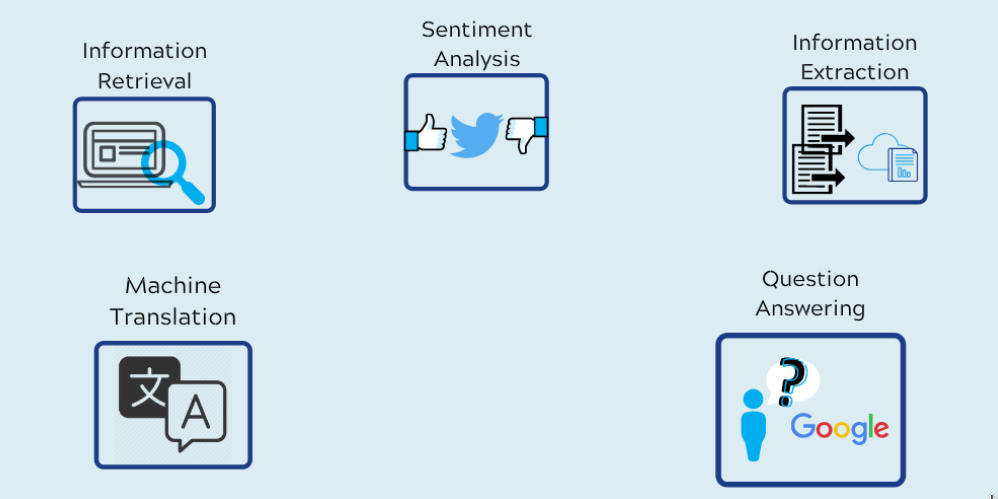

les etapes ely besh ta3malhom fi probleme DL fel nlp yet3aoudou barsha ou yshabhou leb3athom donc lioum 5tart  example seher mta3 "text generation" ou besh ne5dmoou a3lih ou nefehmou bih el "nlp"

le hadaf mel task hetha houa ana nmedou lel pc she3r ou nrodouh y7aouel y3mel she3r e5er kifou. 

tnajem tkoun zeda kteb ouala 9Esa el mouhem houa ya9raha el kol yefhemha ou y7aouel yekteb kifha ou hetha houa el "text generation"

In [2]:
#kil 3ada
import tensorflow as tf 
import numpy as np 
import pandas as pd 

In [3]:
# wget just nesta3mlouha besh nsobou 7ajet men blasa ble man 7elou bel browser 
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt
#sabina file esmou irish-lyrics-eof.txt
#5abineh fi /tmp

--2021-12-15 19:43:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-12-15 19:43:30 (84.7 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
#ne7elou el file b python 
data = open('/tmp/irish-lyrics-eof.txt').read()
# .read() tnajem ken ta9ra menou matnajamesh tbadel fel file 

#el cropus houa el text ely besh ne5edmou a3lih 
#betbi3a kil3ada ta3mel preprocessing mel louel 
#nroudouh el kol lower case el .lower()
#ou na9smou el fa9ra ely 3ana el joumal b .split("\n")
corpus = data.lower().split("\n")
#haka split oualet lista mta3 joumal 
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

el data set mte3na lehna mahiesh m3a9da barsha donc mast7a9inesh na3mlou barsha "normalization"  ama sa3at ki tebda el data set mte3k m5alebsa belkesh test7a9 tna7i 7ajet kif el punctuation ouala el emojies ouala links, enty ou el task ely te5dem fih ouenty ouel dataset
kenek t7eb ta3ref akther a3la kifesh ta3mel hethoukom el kol a great place to start is 
https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
#k9abl ma nemedou el text ely a3malenlou el preprocessing lel model 
#lezem n9asmouh el des tranches s8ar esmhom tokens
#kol kelma sta3maletha enty touali "token" (mara barsk)
#mithel neftarthou el corpus mte3na houa ["HI GDSC","I Love GDSC"]
#el tokens mte3na houma "Hi" "I" "Love" "GDSC"
#el tokens hethom el kol mab3athom esemhom "vocab" 
#ma3neha el kelem ely houa t3amlou el kol
#betbi3a fama barsha parameters yode5lou fiha el 7keya kif 
#"I" ne7sbouha token ouala le 
#"Hi" heya bidha "hi" ouala le 
#oubarsha 7ajet o5ra ama man8ir ma n3a9douha taoua 


#leli ya3ref OOP 3ana class esmja Tokenizer lezem na3mlou menha instance 
tokenizer=Tokenizer()
#el tokenizer enmedoulou el corpus ya9rah ou y9asmou kif ma 9olna
tokenizer.fit_on_texts(corpus)


#ou ba3d yeshed kol kelma t3alamha ya3tiha num besh ynathem rou7ou
#{"GDSC":1, "Hi":2, "Love":3 "I":4}
#besh nshoufou el vocab hetheka na3mlou tokenizer.word_index
#traj3elna python dictionary fih kol kelma ou el num mte3ha (word and index)
total_words=len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

behi taoua shadina text a
3malnelou el preprocessing el lezem 9asemneh el klem ou a3tina el kol kelma num

ama kifesh najmou nrodou el model yekteb joumal bel klem ely t3almou ?

besh nesta3mlou supervised learning 

neftarthou ely el jomla mte3na heya "Hi how are you" "I love gdsc" "hi, did you start"

el tokens mta3na mte3na houema "Hi" "How" "are" "you" "gdsc" "love" "I" "did" "start"

ne5thou el jolma loula "Hi how are you" nrodouha "Hi" "How" "are" "you" 

ou nouariouah ken "hi" "how" "are" ou n9oulou kamel yemshi yshouf kol kelma houa ya3rafha ou ya3tiha probabilite mta3 anha tkoun heya el kelma ne9da ou b3ad akther kelma 3andha prob yraja3helek lehne besh tkoun "you"

In [6]:
input_sequences = []
#el corpus maou 9olna houa lista mta3 joumal 
for line in corpus:
  #kol jomla 9ba3l ma nda5louha fel model na3aouthou el klem mte3ha bel 
  #les nums ely 7kina a3lihom
  token_list = tokenizer.texts_to_sequences([line])[0]
  #behi rakez m3aya shouaya taoua xD
  #el ngrams houa "language model"
  #el hadaf menou ana ne7sbou el probabilite mta3 kol jomla 
  #shneya ma3neha 
  #a7na 9olna el kol jomla tetkaouen men klema haka ouala le 
  #ama el klem hetheka akid yebda mrateb 
  #t9oul "3aslema"+"aziz" moush "aziz"+"3aslema"
  #el hadaf ana nfasrou lel model el tartib
  #ouiouali ya3ref kol kelma ouin tji ou hal el tarkib ely 3amlou houa
  #s7i7 ouala 8alet 
  #donc el matloub
  #tmedlou mara kelmet "3aslema" yet3alamha
  #ba3dha tmedlou "aziz"
  #ba3d tmedlou "3aslema aziz" les9a haka
  #houa taoua ya3ref ely "3aslema" kelma oua7adha ou "aziz" kelma oua7adha 
  # ou kihoua yesta3mel "3aslema" ynajem yzid ba3dha "aziz"
  #ouhetha houya el n-grams 
  #n ma3neha ay num
  #ken el n 2 ma3neha n9ariouah des combinaison mta3 zouz kelmet maktharesh
  #lehna fel exp hetha yesta3mel fi N 9ad kol jomla (range(1,token_list))
  for i in range(1, len(token_list)):
    #ta3mel el n-gram mte3ek
    n_gram_sequence = token_list[:i+1]
		#t5abih fi lista
    input_sequences.append(n_gram_sequence)
#ki tkamel 
#lezmek ta7res ely n-grams el kol fard toul 
#mathalan "3aslema" lezemha fi fared kobel m3a "3aslema aziz"
#ama a7na 9olna houa ye5dem eb des num donc houa el lista ely 3andou fiha 
#mathalan [1] [1,2] besh nrodou hom fard toul nzidou des 0 mel louel ouala mel le5er 
#houa 7at pre donc nzidou mel louel 
#touali : [0,1] [1,2]
#el 0 hetheka ma3andou 7atta ma3na fel jomla

#yshouf atouel jomla 3andou 9adesh
max_sequence_len = max([len(x) for x in input_sequences])
#y5alet lo5rin el kol a3liha
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) 


#supervised learning
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
#mathlam el jomla "3aslema aziz labes"
#tmedlou "3aslema aziz" ou t9olou kamel 
#y9olek "labes" ken 9alek 7aja o5ra t3a9bou ken s7i7a t9olou sa7it xD

#fama moshkla ama 
#a7na 9olna ely houa ye5dem eb des num haka ouala le
#donc tmedlou 1 2 ou testaneh besh y5arajlek 3
#ama houa ynajem y5arej ken des probailite 
#donc lezem nel9aouelha 7al el 7keya 
#ely houa el one-hot encoding 
#7kina a3lih el bera7
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
#ken ma fhemtesh fel meet el jey 9oli xD


a5iran !!!!!!!!!!!!!!!
besh na3mlou el model 
kif mata3rfou el neural network mantharha haka 

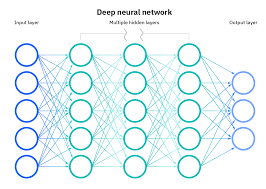

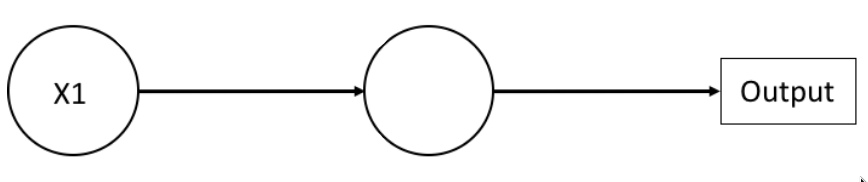

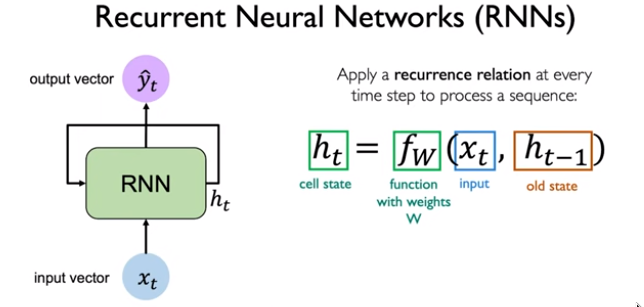

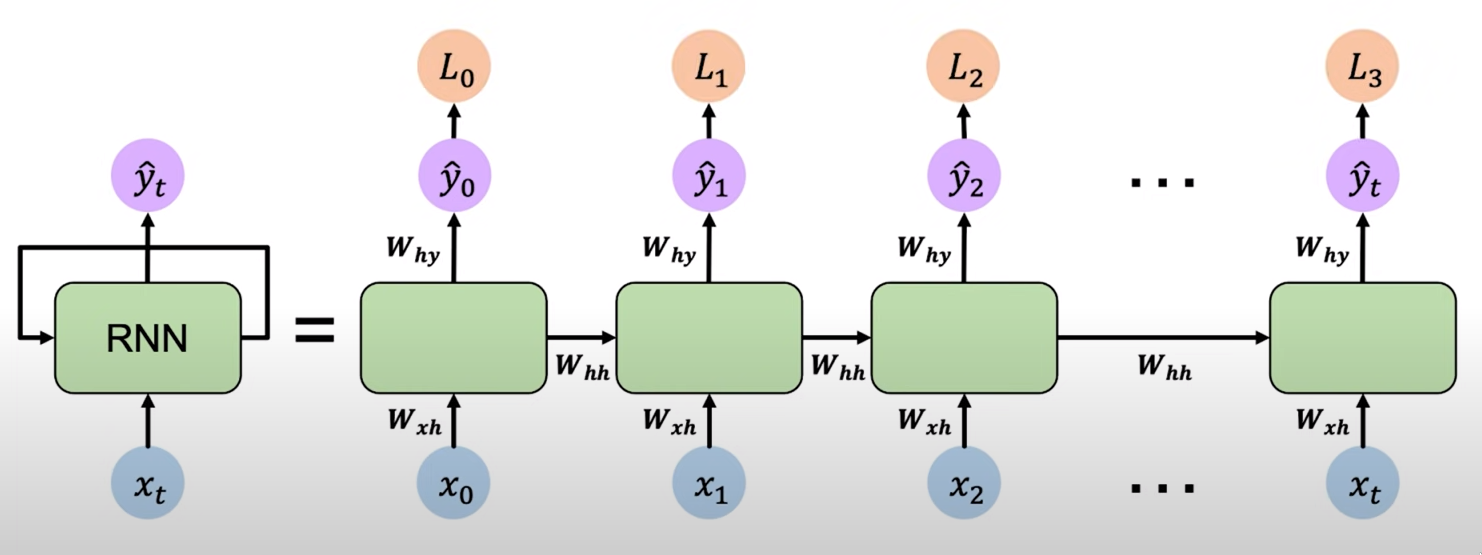

#  one last thing el embedding

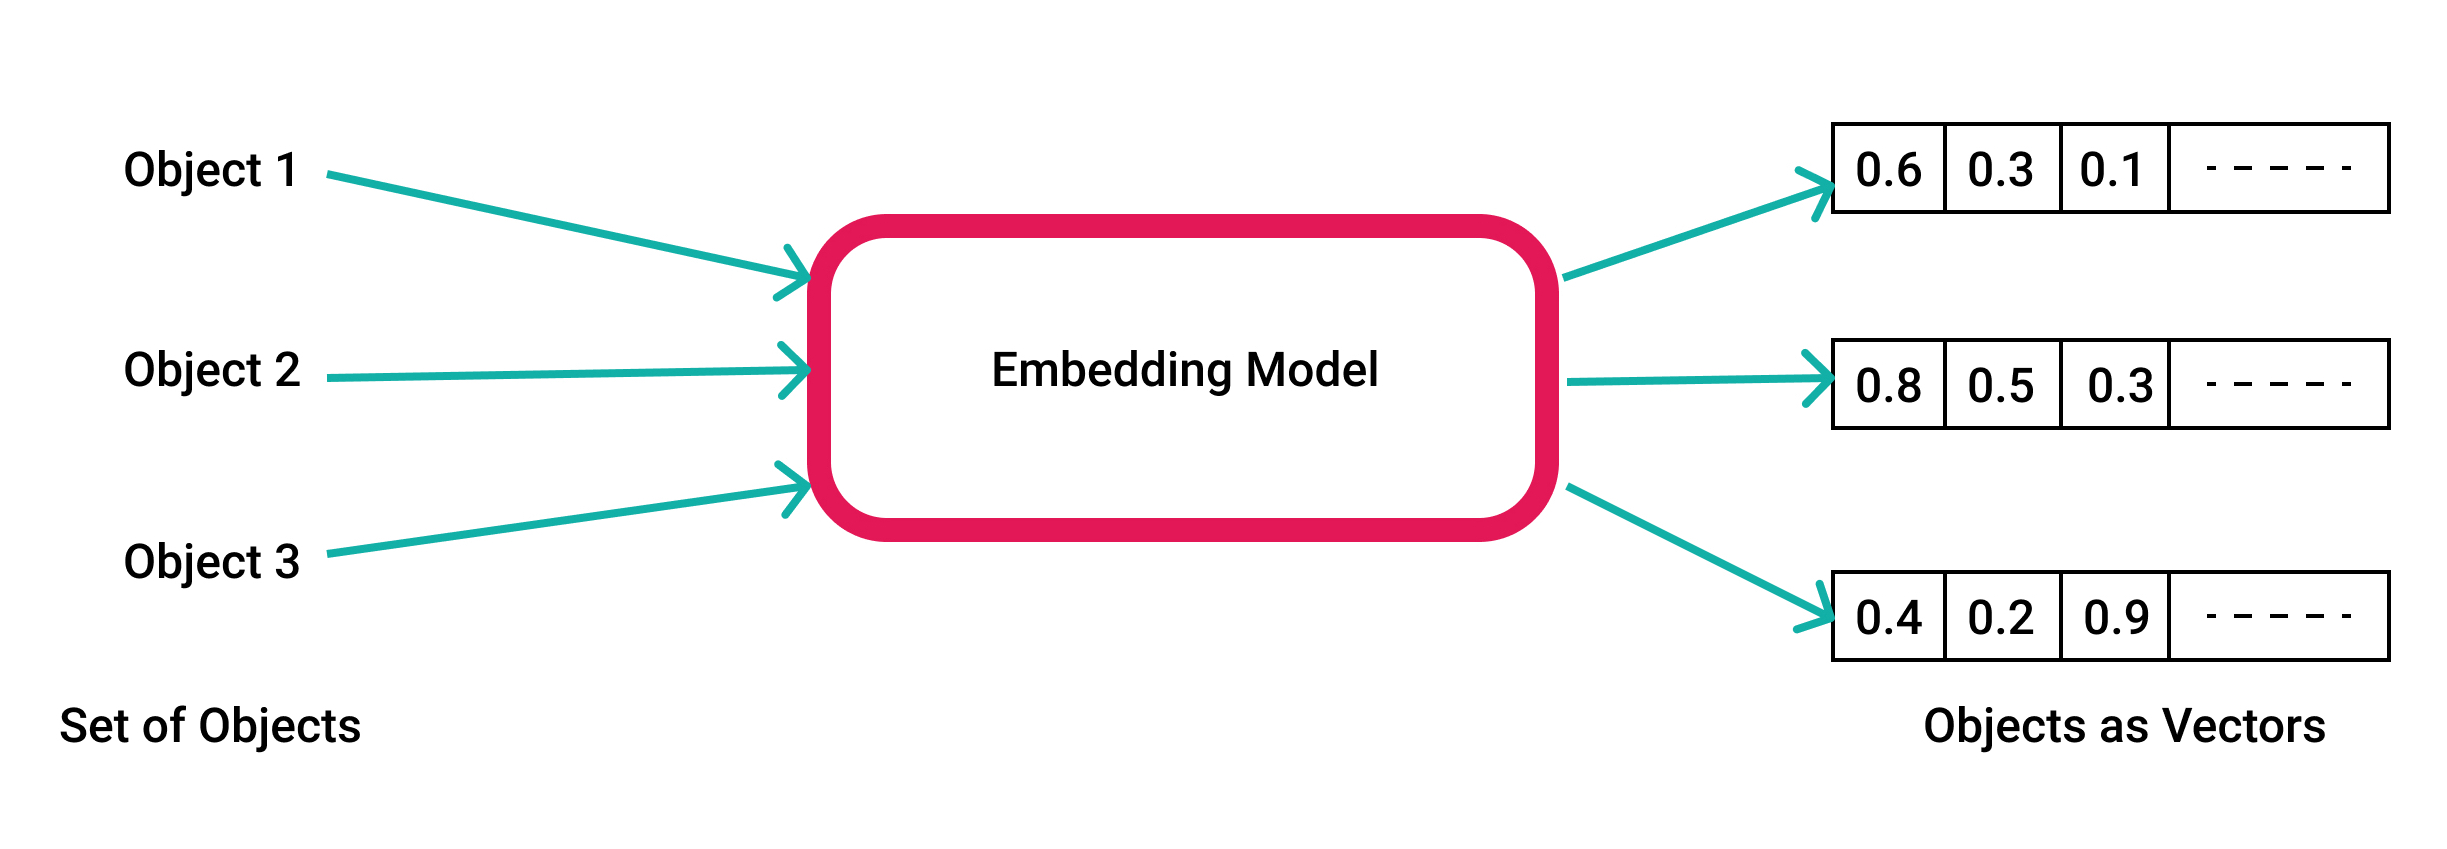

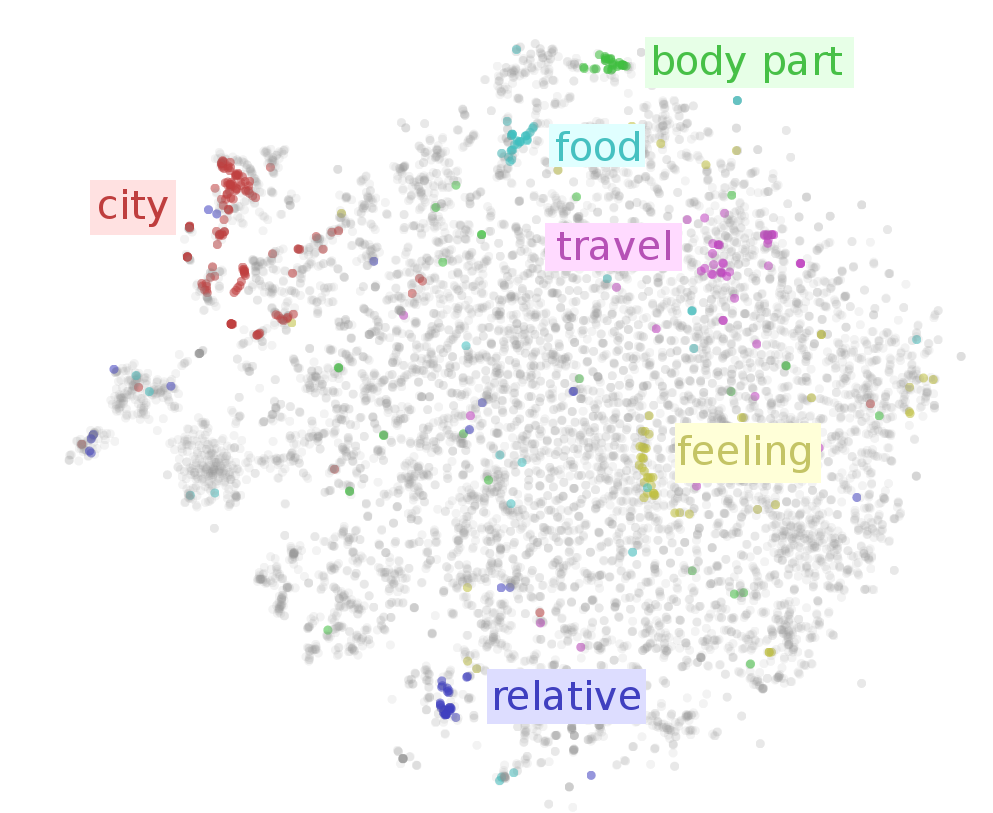

In [ ]:
#nn = neural netwrk xD 
#el layers mta3 el nn yjiou joret b3athom ki el sequence 
#donc lezem el model mte3na el shakem me3ou sequential 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
model = Sequential()


#nzidou el layers mte3na lel model
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150)))
#el output layer ely heya softmax (oua3la hetheka a3malna one hot encoding 9bila)
#ama shneya heya el softmax
#3ibara enty maditlou el jomla mte3ek "3aslema aziz" (el ijeba s7i7a hey yzid "labes")
# yemshi yshouf el klem ely houa met3almou el kol 
# oukol kelma ya3tiha probabilite 
# neftaryhou houa maou met3alem ken 3 kelmet 
# youali el output mte3ou vector (0.1,0.1,0.8)
# el 0.8 heya a3la oua7da hethika heya "labes"
#donc ymedlek vector maktoub fih (0,0,1) ely houa bidou el one hot representation mat3 labes
model.add(Dense(total_words, activation='softmax'))
#hethouma fihom barsha math donc n5aliouhom el ba3d fel session,ena bidi mani fehem menhom shay XD
#hetha el optimizer 
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.01)
#compile el model ma3neha zid fih el optmizer ou el loss function 
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#ou taoua the final step we train it !!!!!!!!!!!!!!!!!!!!!!!!!!
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
377/377 [==============================] - 28s 62ms/step - loss: 6.6556 - accuracy: 0.0725
Epoch 2/100
377/377 [==============================] - 26s 69ms/step - loss: 5.7993 - accuracy: 0.1085
Epoch 3/100
377/377 [==============================] - 24s 63ms/step - loss: 4.9635 - accuracy: 0.1588
Epoch 4/100
377/377 [==============================] - 23s 62ms/step - loss: 4.0957 - accuracy: 0.2252
Epoch 5/100
377/377 [==============================] - 23s 62ms/step - loss: 3.2921 - accuracy: 0.3199
Epoch 6/100
377/377 [==============================] - 24s 63ms/step - loss: 2.6423 - accuracy: 0.4088
Epoch 7/100
377/377 [==============================] - 24s 64ms/step - loss: 2.1257 - accuracy: 0.5098
Epoch 8/100
377/377 [==============================] - 24s 64ms/step - loss: 1.7309 - accuracy: 0.5886
Epoch 9/100
377/377 [==============================] - 24s 64ms/step - loss: 1.4609 - accuracy: 0.6503
Epoch 10/100
377/377 [==============================] - 24s 64ms/step - l

In [ ]:
import matplotlib.pyplot as plt
# el accuracy heya 9adesh men mara el ijeba tal3et s7i7aa
#na3mlou grpah besh nouath7ou el oumour
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [ ]:
#toua el test
#nemsoiulou jomla 
#na3mloulha el preprocessing el lezem 
#ou nshoufou el output  
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Hope you enjoyed ! :)